In [1]:
# !pip install langdetect
# !pip uninstall googletrans==4.0.0-rc1
# !pip install translate
# !pip install textblob

In [2]:
from detoxify import Detoxify

In [3]:
results = Detoxify('original').predict('fuck you')
results

{'toxicity': 0.9977558,
 'severe_toxicity': 0.4578004,
 'obscene': 0.992953,
 'threat': 0.0037068229,
 'insult': 0.953166,
 'identity_attack': 0.015627943}

In [4]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
# from googletrans import Translator
from textblob import TextBlob
import csv

In [5]:
comments_data = pd.read_csv('comments.csv')
print(comments_data.shape)
comments_data.head()

(78792, 5)


,video_id,comment_id,comment_content,reply_count,is_reply
0,dbTjpPLv9NE,UgwmtpT1RWJvGQIq3Sh4AaABAg,ахахахахаха😂 хохлы 🤡,0,False
1,dbTjpPLv9NE,UgxiApN5HXNrRKSAFoh4AaABAg,путин может встретиться с илоном. СЛАВА РОССИИ...,0,False
2,dbTjpPLv9NE,UgxE7SJKnYgzM6gVsEd4AaABAg,Разница в том что это твой отчим а не Зеленски...,0,False
3,dbTjpPLv9NE,UgwvIS8PjloawqoCIa14AaABAg,Эмм путин топ,0,False
4,dbTjpPLv9NE,UgyvnzkUj1hFjX438Fl4AaABAg,🐖💨🇺🇦🏳️‍🌈🇺🇸🇮🇱🇬🇧🇸🇪👹👹👹👹👹,0,False


In [6]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

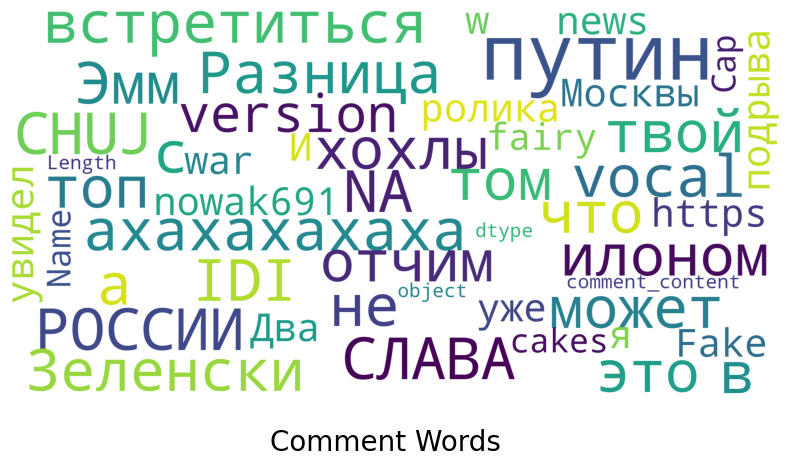

In [7]:
show_wordcloud(comments_data['comment_content'], title = 'Comment Words')

## Preprocessing

In [8]:
nan_count = comments_data['comment_content'].isna().sum()
print("NAN Comments Count", nan_count)
comments_data = comments_data.dropna(subset=['comment_content'])

NAN Comments Count 15


In [9]:
# # Stopword list
# pattern = re.compile(r'\b('+r'|'.join(stopwords.words('english'))+r')\b\s*')

# # @cuda.jit(device=True)
# def unicode_to_ascii(s):
#   return ''.join(c for c in unicodedata.normalize('NFD', s)
#       if unicodedata.category(c) != 'Mn')

# # @tf.function()
# def clean_text(text):
#     text = unicode_to_ascii(text.lower().strip())
    
#     #replacing email addresses with blank space
#     text = re.sub(r"[a-zA-Z0-9_\-\.]+@[a-zA-Z0-9_\-\.]+\.[a-zA-Z]{2,5}"," ",text)
    
#     #replacing urls with blank space
#     text = re.sub(r"\bhttp:\/\/([^\/]*)\/([^\s]*)|https:\/\/([^\/]*)\/([^\s]*)"," ",text)
    
#     # creating a space between a word and the punctuation following it
#     text = re.sub(r"([?.!,¿])", r" \1 ", text)
#     text = re.sub(r'[" "]+', " ", text)
    
#     # replacing all the stopwords
#     text = pattern.sub('',text)
    
#     # removes all the punctuations
#     text = re.sub(r"[^a-zA-Z]+", " ", text)
    
#     text = text.strip()

#     # adding a start and an end token to the sentence so that the model know when to start and stop predicting.
#     #     text = '<start> ' + text + ' <end>'
    
#     return text

# clean_text_vect = np.vectorize(clean_text)


## Language Distribution

In [10]:
# from langdetect import detect, LangDetectException

# def detect_language(text):
#     print(text)
#     try:
#         return detect(text)
#     except LangDetectException:
#         return 'Unknown'

# comments_data['language'] = comments_data['comment_content'].apply(detect_language)


In [11]:
# comments_data['language'].value_counts()

In [12]:
# comments_data.to_csv('comments_with_lang.csv', index=False)

In [13]:
comments_data = pd.read_csv('comments_with_lang.csv',
                 lineterminator='\n')
comments_data = comments_data[comments_data['language'] != 'Unknown']
comments_data.head()

,video_id,comment_id,comment_content,reply_count,is_reply,language
0,dbTjpPLv9NE,UgwmtpT1RWJvGQIq3Sh4AaABAg,ахахахахаха😂 хохлы 🤡,0,False,ru
1,dbTjpPLv9NE,UgxiApN5HXNrRKSAFoh4AaABAg,путин может встретиться с илоном. СЛАВА РОССИИ...,0,False,ru
2,dbTjpPLv9NE,UgxE7SJKnYgzM6gVsEd4AaABAg,Разница в том что это твой отчим а не Зеленски...,0,False,ru
3,dbTjpPLv9NE,UgwvIS8PjloawqoCIa14AaABAg,Эмм путин топ,0,False,ru
5,dbTjpPLv9NE,UgymTaWiJW11p5PbVSN4AaABAg,Нее Путин так не может.!,0,False,ru


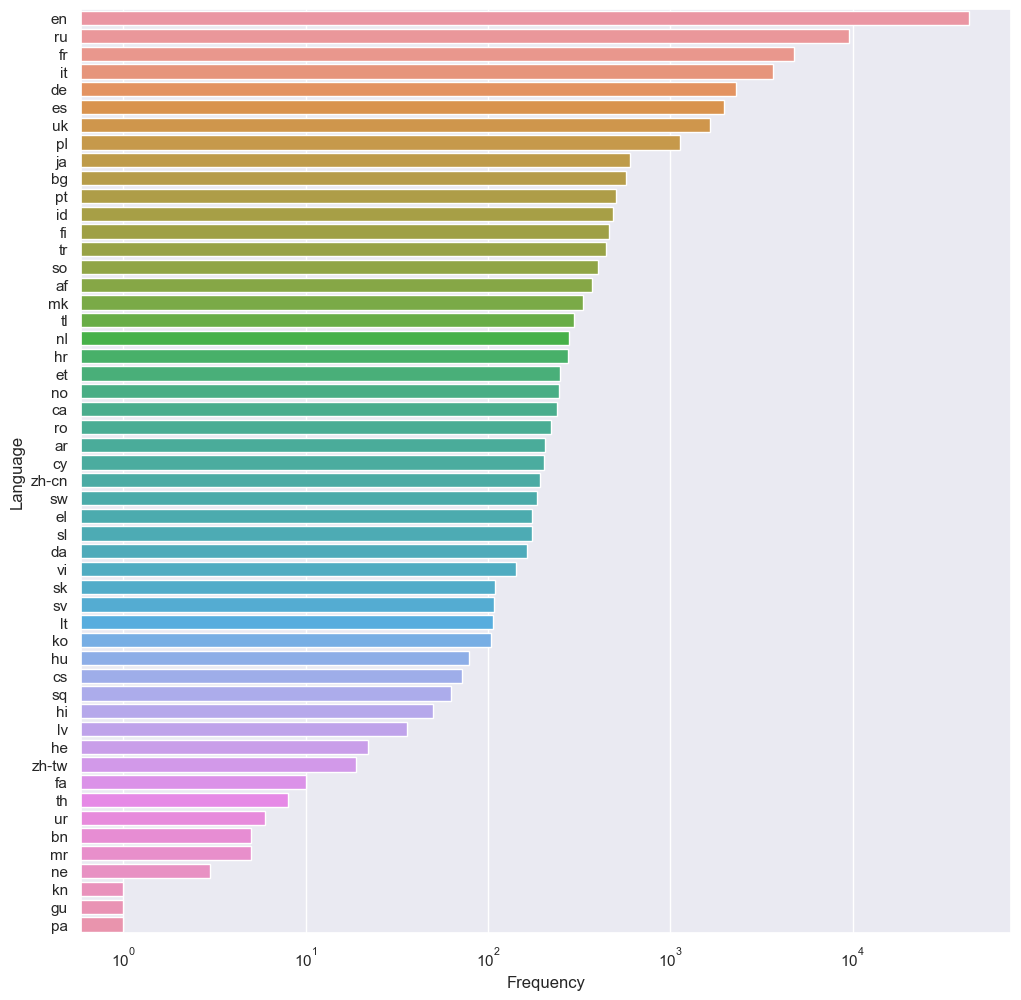

In [14]:
sns.set(rc={'figure.figsize':(12,12)})

x_val = comments_data['language'].value_counts()
y_val = comments_data['language'].value_counts().index
# seaborn.barplot(x=df.reputation.value_counts().index, y=df.reputation.value_counts())

 
 
# who v/s fare barplot
sns.barplot(x = x_val,
            y = y_val)
plt.xscale('log')
plt.xlabel('Frequency')
plt.ylabel('Language')
 
# Show the plot
plt.show()

## Text Length Analysis

In [15]:
comments_data['text_length'] = comments_data['comment_content'].str.len()
comments_data['text_length'].value_counts()

18      678
27      672
25      652
20      648
24      641
       ... 
3935      1
3243      1
2831      1
2361      1
1387      1
Name: text_length, Length: 1843, dtype: int64

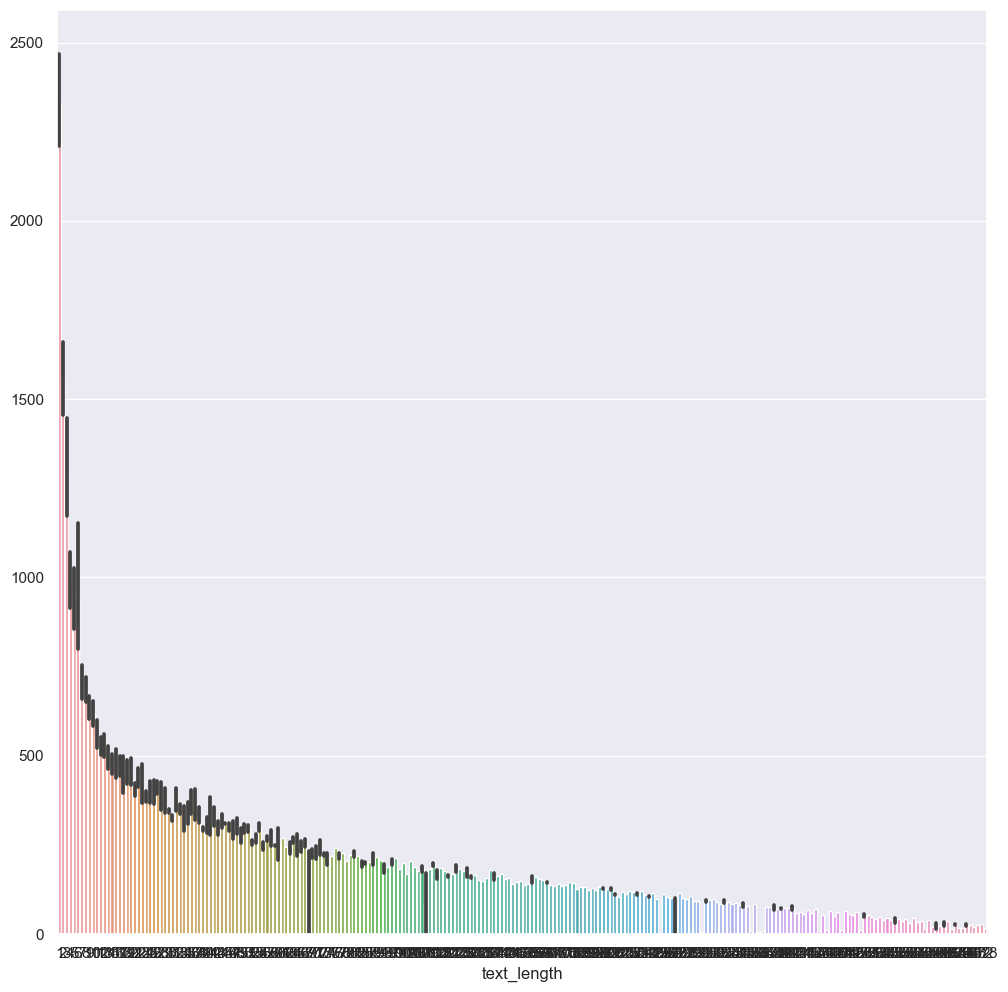

In [16]:
sns.set(rc={'figure.figsize':(12,12)})

x_val = comments_data['text_length'].value_counts()
y_val = comments_data['text_length'].value_counts().index
 
sns.barplot(x = x_val,
            y = y_val)
# plt.xscale('log')
# plt.xlabel('Frequency')
# plt.ylabel('Language')
 
# Show the plot
plt.show()

Text(0.5, 1.0, 'Distribution of comment Lengths')

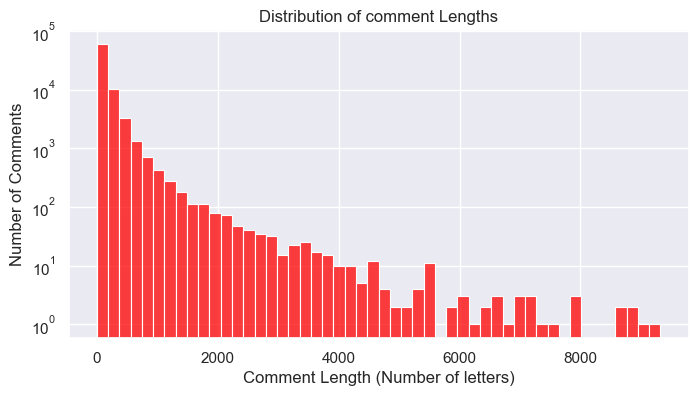

In [17]:
comment_len = comments_data['comment_content'].str.len()

# plot the distribution of comment lengths
plt.figure(figsize=(8,4))
sns.histplot(comment_len, kde=False, bins=50, color="red")
plt.xlabel("Comment Length (Number of letters)", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.yscale('log')
plt.title("Distribution of comment Lengths", fontsize=12)

## Translate to English

In [18]:
# from translate import Translator
# import pandas as pd


# # Define translation function
# def translate_to_english(text, language):
#     translator = Translator(from_lang=language, to_lang="en")  # Translate from Russian to English

#     translation = translator.translate(text)
#     print(translation)
#     return translation


# # Assuming 'comments_data' is your DataFrame
# df = pd.DataFrame(comments_data).iloc[:1000, :]  # Create a new DataFrame

# # Apply translation function to 'comment_content' and 'language' columns
# df['translated_text'] = df.apply(lambda row: translate_to_english(row['comment_content'], row['language']), axis=1)


In [19]:
# from microsoft_translator import Translator

# # Create a translator object
# translator = Translator(subscription_key='your_subscription_key')

# # Define the text and source language
# text = "Эмм путин топ"
# source_language = 'ru'

# # Translate the text to English
# translation = translator.translate(text, lang_from=source_language, lang_to='en')

# # Print the translated text
# print(translation)

### Get english comments only

In [20]:
df_en = comments_data[comments_data['language'] == 'en']
print(df_en.shape)
df_en.head()

(43481, 7)


,video_id,comment_id,comment_content,reply_count,is_reply,language,text_length
66,dbTjpPLv9NE,UgyMl0GhRsyvucojIl14AaABAg,Where is the Heroine on his desk?,1,False,en,33
68,dbTjpPLv9NE,Ugz6i9I4JKv7LaCwXad4AaABAg,his voice is full cocaine,0,False,en,25
77,dbTjpPLv9NE,UgyqmLabZ9n_0XLGApp4AaABAg,Death Russia,0,False,en,12
100,8yn1esLdK8o,UgytR_avsHtC-pEq96p4AaABAg,Ukraine Are Neo-Nazis Rascist Slaves to Americ...,0,False,en,754
101,8yn1esLdK8o,UgxEbvdMXt1s3KYAEXV4AaABAg,There’s a lot of money to be made in wars. Ask...,0,False,en,54


## Sentiment Analysis

In [21]:
# Define a function for sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
    


In [22]:
textSeries = df_en['comment_content']  # ToDo: Change this to translated text column

sentiments = textSeries.apply(analyze_sentiment)

# Create a new DataFrame with the original text and sentiment analysis results
sentiments_df = pd.DataFrame({'Text': textSeries, 'Sentiment': sentiments})

# Print the DataFrame
sentiments_df


,Text,Sentiment
66,Where is the Heroine on his desk?,Neutral
68,his voice is full cocaine,Positive
77,Death Russia,Neutral
100,Ukraine Are Neo-Nazis Rascist Slaves to Americ...,Negative
101,There’s a lot of money to be made in wars. Ask...,Neutral
...,...,...
78762,Ahhh nothing like fake media,Negative
78764,"Putin like Hitler, die in the mud, question of...",Neutral
78769,Fake news reported.,Negative
78772,IDI NA CHUJ vocal version / nowak691 https://w...,Neutral


In [23]:
sentiments_df['Sentiment'].value_counts()

Positive    19027
Neutral     13845
Negative    10609
Name: Sentiment, dtype: int64

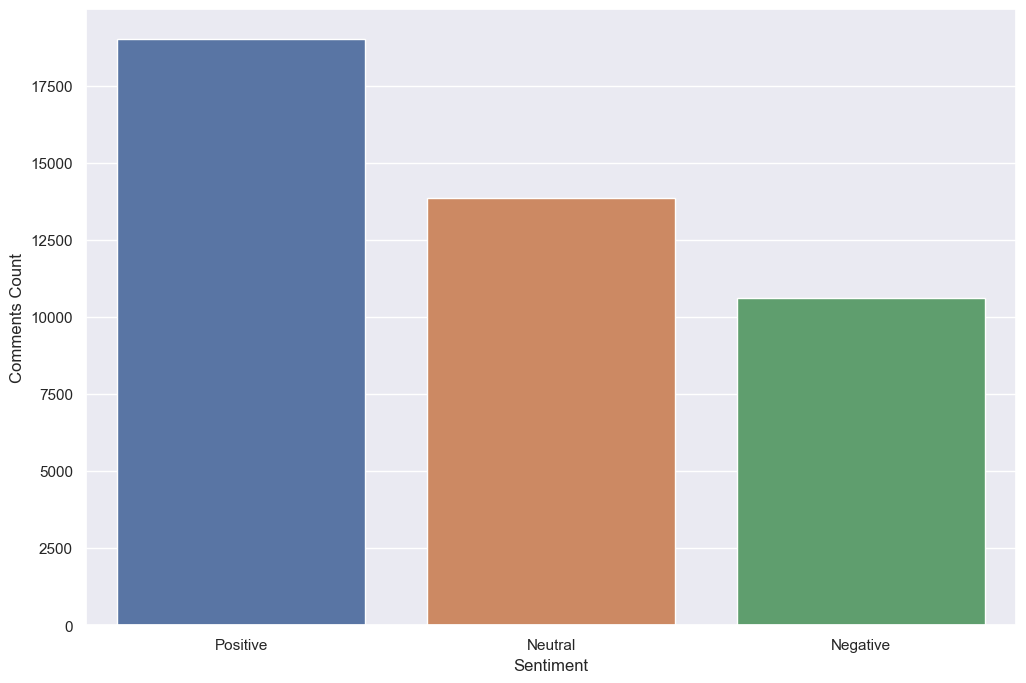

In [24]:
sns.set(rc={'figure.figsize':(12,8)})

x_val = sentiments_df['Sentiment'].value_counts().index
y_val = sentiments_df['Sentiment'].value_counts()
 
sns.barplot(x = x_val,
            y = y_val)
plt.xlabel('Sentiment')
plt.ylabel('Comments Count')
 
# Show the plot
plt.show()

## Word Clouds

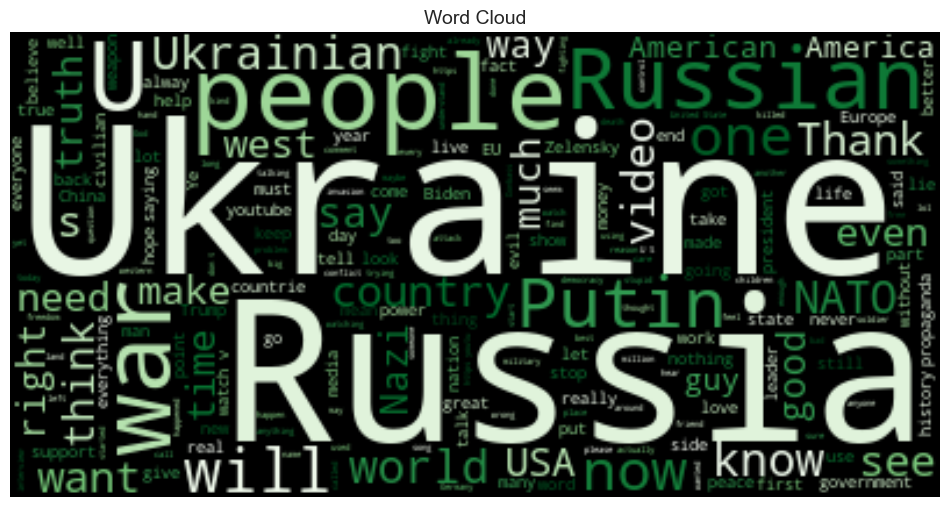

In [25]:
text = " ".join(i for i in df_en['comment_content'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, colormap="Greens").generate(text)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud", fontsize=14)
plt.show()

## Toxicity Analysis

In [26]:
# Languages supported by Detoxify
languages = ['en', 'fr', 'es', 'it', 'pt', 'tr', 'ru']

# Get the subset of DataFrame with specified languages
toxic_df = comments_data[comments_data['language'].isin(languages)]

# Display the subset DataFrame
print(toxic_df.shape)
toxic_df.head()

(64416, 7)


,video_id,comment_id,comment_content,reply_count,is_reply,language,text_length
0,dbTjpPLv9NE,UgwmtpT1RWJvGQIq3Sh4AaABAg,ахахахахаха😂 хохлы 🤡,0,False,ru,20
1,dbTjpPLv9NE,UgxiApN5HXNrRKSAFoh4AaABAg,путин может встретиться с илоном. СЛАВА РОССИИ...,0,False,ru,111
2,dbTjpPLv9NE,UgxE7SJKnYgzM6gVsEd4AaABAg,Разница в том что это твой отчим а не Зеленски...,0,False,ru,73
3,dbTjpPLv9NE,UgwvIS8PjloawqoCIa14AaABAg,Эмм путин топ,0,False,ru,13
5,dbTjpPLv9NE,UgymTaWiJW11p5PbVSN4AaABAg,Нее Путин так не может.!,0,False,ru,24


In [27]:
# results = Detoxify('multilingual').predict(['example text','exemple de texte','texto de ejemplo','testo di esempio','texto de exemplo','örnek metin','пример текста'])



### Create a new csv file

In [28]:
# Define the data for the new rows
new_rows = [
    ['text', 'language', 'toxicity', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit']
]

# Define the file name for the new CSV file
filename = 'comments_toxicity.csv'

# Write the new rows to the CSV file
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(new_rows)

print(f"New CSV file '{filename}' created successfully.")

New CSV file 'comments_toxicity.csv' created successfully.


### Predict and add Toxicity to a csv file

In [29]:
def add_toxicity_results(data_array):
    # Append new rows to the existing CSV file
    with open(filename, 'a', newline='') as file:
        writer = csv.writer(file)
        for row in data_array:
            writer.writerow(row)

In [30]:
def get_toxicity(start_index, end_index):
    comments_text_list = toxic_df['comment_content'][start_index:end_index].tolist()
    comments_language_list = toxic_df['language'][start_index:end_index].tolist()
    results = Detoxify('multilingual').predict(comments_text_list)

    # Define the DataFrame
    data = {
        'text': comments_text_list,
        'language': comments_language_list, 
    }

    df = pd.DataFrame(data)
    # Add the toxicity scores to the DataFrame
    df = df.assign(**results)
    return df.values.tolist()



In [32]:
# Define the batch size
batch_size = 10

# Calculate the number of batches
num_batches = (len(toxic_df) - 1) // batch_size + 1

# num_batches = 2

# Process the DataFrame in batches
for batch_index in range(num_batches):
    print("Batch %d of %d" % (batch_index, num_batches))
    start_index = batch_index * batch_size
    end_index = min(start_index + batch_size, len(toxic_df))
    
    toxicity_result = get_toxicity(start_index, end_index)
    add_toxicity_results(toxicity_result)